In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [3]:
pwd

'C:\\Users\\willn\\SynergisticIT\\Data Science\\Association Rule'

In [4]:
books_df = pd.read_csv('book.csv')
books_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## Data Cleaning - Removing rows that are all 0's and thus have no data to contribute 

In [5]:
df_sums = books_df.sum(axis = 1)
print(df_sums)


0       3
1       1
2       0
3       5
4       2
       ..
1995    6
1996    0
1997    0
1998    1
1999    0
Length: 2000, dtype: int64


In [6]:
type(df_sums)

pandas.core.series.Series

In [7]:
type(df_sums[0])

numpy.int64

In [8]:
# create new Total column to compare against 0
books_df['Total'] = df_sums
books_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Total
0,0,1,0,1,0,0,1,0,0,0,0,3
1,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0,5
4,0,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1,6
1996,0,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0,1


In [9]:
# list for drop indices
drop_indexes = []
# loop through dataframe using iterrows() via index and row to filter rows with a total value of 0 (no data; all 0's in columns)
for index, row in books_df.iterrows():
    if row['Total'] == 0:
        drop_indexes.append(index)
print(drop_indexes)

[2, 10, 22, 31, 34, 39, 45, 49, 51, 53, 57, 59, 60, 65, 66, 69, 75, 86, 88, 109, 112, 113, 117, 121, 124, 129, 135, 136, 151, 153, 155, 164, 165, 168, 178, 180, 182, 188, 189, 194, 202, 210, 213, 218, 219, 222, 234, 238, 240, 248, 251, 253, 258, 259, 260, 263, 267, 275, 277, 280, 281, 282, 283, 286, 290, 305, 306, 311, 313, 317, 321, 322, 329, 333, 346, 359, 365, 367, 370, 371, 375, 377, 385, 387, 388, 390, 391, 396, 398, 400, 403, 409, 423, 424, 432, 433, 435, 439, 451, 453, 454, 455, 461, 468, 474, 481, 483, 486, 487, 495, 499, 501, 504, 512, 514, 516, 518, 529, 534, 537, 539, 545, 548, 550, 552, 554, 556, 569, 579, 586, 593, 595, 598, 607, 614, 620, 622, 624, 627, 631, 640, 646, 647, 649, 652, 657, 658, 661, 677, 679, 681, 691, 703, 705, 713, 717, 723, 724, 726, 728, 733, 738, 740, 752, 753, 761, 763, 765, 768, 771, 772, 775, 780, 786, 795, 798, 810, 811, 825, 833, 840, 841, 843, 846, 848, 849, 850, 852, 866, 868, 870, 871, 874, 876, 878, 887, 890, 891, 903, 906, 920, 927, 942, 944,

In [10]:
# see how many rows have 0 data; is it too many rows? 421 rows consitutes roughly 1/5 to 1/4th of data (2000 - 421 = 1579)
# row loss is acceptable even if the rows offered no data
len(drop_indexes)

421

In [11]:
# loop through dataframe compare index numbers to drop_indexes, if index in list, drop row
# reset the data frame index
test_list = []
for index, rows in books_df.iterrows():
    if index in drop_indexes:
        test_list.append('Dropped')
        books_df.drop(index, axis=0, inplace = True)

print("Number of rows dropped: {}".format(len(test_list)))

books_df.reset_index(drop=True, inplace=True)
books_df

Number of rows dropped: 421


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Total
0,0,1,0,1,0,0,1,0,0,0,0,3
1,1,0,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,1,0,1,0,0,0,0,5
3,0,0,1,0,0,0,1,0,0,0,0,2
4,1,0,0,0,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1574,1,0,1,1,0,0,1,1,0,0,0,5
1575,0,0,0,0,0,1,0,0,0,0,0,1
1576,0,1,1,1,0,1,1,1,0,1,0,7
1577,0,0,1,0,0,1,1,1,0,1,1,6


In [12]:
books_df_clean = books_df.drop(columns='Total')
books_df_clean

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1574,1,0,1,1,0,0,1,1,0,0,0
1575,0,0,0,0,0,1,0,0,0,0,0
1576,0,1,1,1,0,1,1,1,0,1,0
1577,0,0,1,0,0,1,1,1,0,1,1


## Back to Association Analysis

In [13]:
# import apriori and association_rules from mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [15]:
# using apriori to find frequent item sets/collections
frequent_itemsets = apriori(books_df_clean, min_support = 0.046, max_len = 4, use_colnames=True)
frequent_itemsets

C:\Users\willn\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.535782,(ChildBks)
1,0.313490,(YouthBks)
2,0.545915,(CookBks)
3,0.357188,(DoItYBks)
4,0.271691,(RefBks)
...,...,...
130,0.062698,"(GeogBks, RefBks, DoItYBks, CookBks)"
131,0.082331,"(ArtBks, GeogBks, DoItYBks, CookBks)"
132,0.046232,"(ArtBks, DoItYBks, CookBks, ItalCook)"
133,0.058265,"(ArtBks, GeogBks, RefBks, CookBks)"


In [19]:
frequent_itemsets.sort_values('support', ascending=False, inplace=True)

In [20]:
frequent_itemsets

,support,itemsets
2,0.545915,(CookBks)
0,0.535782,(ChildBks)
3,0.357188,(DoItYBks)
6,0.349588,(GeogBks)
12,0.324256,"(ChildBks, CookBks)"
...,...,...
134,0.047498,"(ArtBks, ItalArt, CookBks, ItalCook)"
39,0.046865,"(ItalAtlas, RefBks)"
8,0.046865,(ItalAtlas)
94,0.046232,"(ArtBks, DoItYBks, ItalCook)"


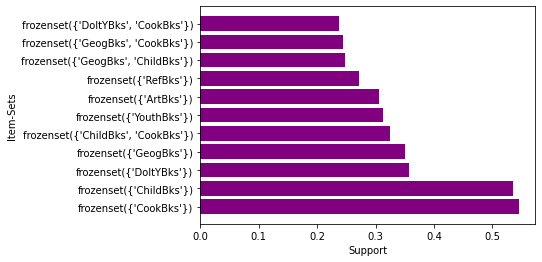

In [27]:
plt.barh(y=list(range(0,11)), width=frequent_itemsets.support[0:11], color='purple')
plt.yticks(list(range(0,11)), frequent_itemsets.itemsets[0:11], rotation = 0)
plt.ylabel('Item-Sets')
plt.xlabel('Support')
plt.show()

In [28]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
#rules.head()
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
871,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.051932,0.071564,0.047498,0.914634,12.780596,0.043782,10.875961
870,"(ArtBks, ItalCook)","(ItalArt, CookBks)",0.071564,0.051932,0.047498,0.663717,12.780596,0.043782,2.819256
851,"(ArtBks, ItalCook)",(ItalArt),0.071564,0.061431,0.047498,0.663717,10.804215,0.043102,2.791007
854,(ItalArt),"(ArtBks, ItalCook)",0.061431,0.071564,0.047498,0.773196,10.804215,0.043102,4.093557
875,(ItalArt),"(ArtBks, CookBks, ItalCook)",0.061431,0.071564,0.047498,0.773196,10.804215,0.043102,4.093557
866,"(ArtBks, CookBks, ItalCook)",(ItalArt),0.071564,0.061431,0.047498,0.663717,10.804215,0.043102,2.791007
863,(ItalCook),"(ItalArt, CookBks)",0.143762,0.051932,0.047498,0.330396,6.362147,0.040033,1.415865
877,(ItalCook),"(ArtBks, ItalArt, CookBks)",0.143762,0.051932,0.047498,0.330396,6.362147,0.040033,1.415865
864,"(ArtBks, ItalArt, CookBks)",(ItalCook),0.051932,0.143762,0.047498,0.914634,6.362147,0.040033,10.030218
858,"(ItalArt, CookBks)",(ItalCook),0.051932,0.143762,0.047498,0.914634,6.362147,0.040033,10.030218
